In [75]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set(style='ticks', palette='Set2')
sns.set_context("talk", font_scale=1.2)
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import tensorflow as tf

In [26]:
%load_ext autoreload
%autoreload 2


In [27]:
import util

In [273]:
num_examples = 200
classe1 = np.column_stack((np.random.normal(2, 0.4, num_examples), np.random.normal(2, 0.4, num_examples)))
classe2 = np.random.normal(4, 0.4, num_examples * 2).reshape(num_examples, 2)
X = np.row_stack((classe1, classe2))
y = np.array([1] * num_examples + [0] * num_examples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

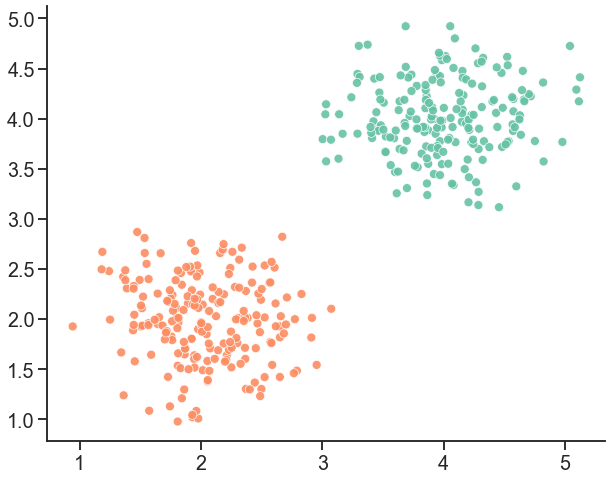

In [274]:
fig = plt.figure(figsize=(10, 8))
_ = sns.scatterplot(X[:,0], X[:,1], hue = y, legend= None, alpha = 0.9)
sns.despine()


In [275]:
wt, epoch, errors = util.perceptron_training(X_train, y_train, epochs=100, learning_rate=0.1, tol = 0.01)

In [276]:
wt

array([-2.19671952, -0.37838592, -0.36019591])

In [104]:
import plotly.express as px
import plotly.graph_objects as go

def plot_decision_boundary(X, y, wt):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, .1))
    Z = util.perceptron_predict(np.c_[xx.ravel(), yy.ravel()], wt)
    Z = Z.reshape(xx.shape)  

    fig = plt.figure(figsize=(10, 8))
    _ = sns.scatterplot(X[:,0], X[:,1], hue = y, legend= None, alpha = 0.9)
    plt.contourf(xx, yy, Z, alpha=0.4)
    sns.despine()

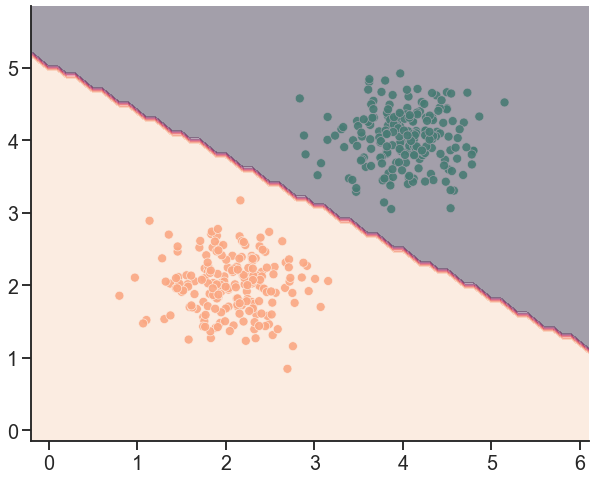

<Figure size 720x576 with 0 Axes>

In [105]:
plot_decision_boundary(X, y, wt)

In [137]:
def mpl_to_plotly(cmap, pl_entries=11, rdigits=2):
    # cmap - colormap 
    # pl_entries - int = number of Plotly colorscale entries
    # rdigits - int -=number of digits for rounding scale values
    scale = np.linspace(0, 1, pl_entries)
    colors = (cmap(scale)[:, :3]*255).astype(np.uint8)
    pl_colorscale = [[round(s, rdigits), f'rgb{tuple(color)}'] for s, color in zip(scale, colors)]
    return pl_colorscale

In [172]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, .1))
Z = util.perceptron_predict(np.c_[xx.ravel(), yy.ravel()], wt)
Z = Z.reshape(xx.shape)  

fig = go.Figure(data=[go.Surface(z=Z, x=xx, y=yy, colorscale= mpl_to_plotly(cmocean.cm.tarn), opacity = 0.7)])
fig.update_layout(autosize=False,
            width=800, height=500,
            margin=dict(l=10, r=10, b=10, t=20))

fig.add_scatter3d(x=X[:,0], y=X[:,1], z = np.zeros(len(X)), mode='markers', marker=dict(color=y, colorscale= mpl_to_plotly(cmocean.cm.tarn), opacity=0.8))
fig.show()


In [174]:
y_pred = util.perceptron_predict(X_test, wt)

In [175]:
accuracy_score(y_test, y_pred)

1.0

In [176]:
confusion_matrix(y_test, y_pred)

array([[58,  0],
       [ 0, 62]], dtype=int64)

In [277]:
iris = pd.read_csv(Path("../Trabalho 1/Datasets/iris.csv"))
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [278]:
iris['Species'] = np.where(iris['Species'] == 'Iris-setosa', 1, 0)
iris = iris.iloc[:,1:]
iris_target = iris.pop("Species")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [279]:
X_train, X_test, y_train, y_test = train_test_split(iris.values, iris_target.values, test_size=0.3, random_state=42)

In [280]:
wt, epoch, errors = util.perceptron_training(X_train, y_train, epochs=100, learning_rate=0.1, tol = 0.01)

In [283]:
wt

array([ 0.64981381,  0.2501595 ,  0.65733048, -1.2417593 ,  0.20441179])

In [281]:
y_pred = util.perceptron_predict(X_test, wt)
accuracy_score(y_test, y_pred)

1.0

In [282]:
confusion_matrix(y_test, y_pred)

array([[26,  0],
       [ 0, 19]], dtype=int64)

In [259]:
accs = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(iris.values, iris_target.values, test_size=0.3, random_state=i)
    wt, epoch, errors = util.perceptron_training(X_train, y_train, epochs=100, learning_rate=0.1, tol = 0.01)
    y_pred = util.perceptron_predict(X_test, wt)
    acc = accuracy_score(y_test, y_pred)
    accs.append((1 - acc)*100)

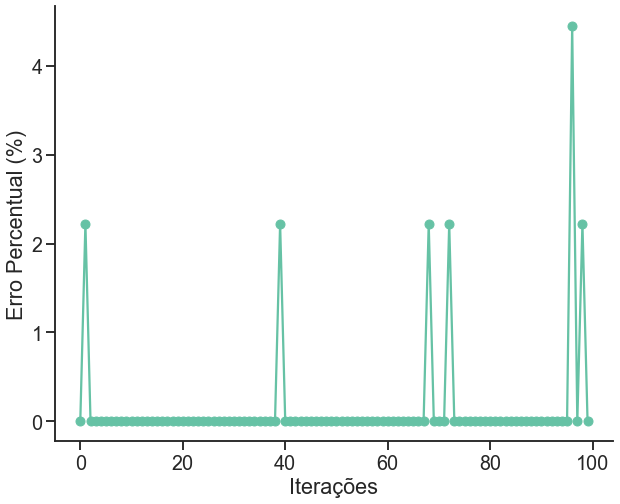

In [260]:
fig = plt.figure(figsize=(10, 8))
_ = plt.plot(accs, marker ='o')
plt.ylabel("Erro Percentual (%)")
plt.xlabel("Iterações")
sns.despine()

In [261]:
np.mean(accs)

0.15555555555555567

In [262]:
np.std(accs)

0.6482645398139923

In [263]:
from sklearn import datasets

In [285]:
cancer = datasets.load_breast_cancer(as_frame = True)
X = cancer['data']
y = cancer['target']

In [286]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [287]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)
wt, epoch, errors = util.perceptron_training(X_train, y_train, epochs=500, learning_rate=0.1, tol = 0.01)
y_pred = util.perceptron_predict(X_test, wt)
accuracy_score(y_test, y_pred)

0.9415204678362573

In [288]:
confusion_matrix(y_test, y_pred)

array([[ 53,  10],
       [  0, 108]], dtype=int64)

In [289]:
wt

array([-1.39259029e+02,  1.08789032e+03, -6.25601180e+02,  4.01294030e+03,
        4.48847240e+02, -7.02577824e+00, -7.65667093e+01, -1.15761839e+02,
       -4.34772813e+01, -1.54024621e+01, -3.51812661e-01,  1.36002906e+01,
       -1.00225337e+02, -2.15183808e+02, -1.26575695e+03, -1.37285923e+00,
       -2.28523316e+01, -2.88743405e+01, -5.14619037e+00, -4.09990680e+00,
       -1.05923537e+00,  1.15675816e+03, -2.77077859e+03,  2.14563758e+03,
       -9.11112742e+02, -2.09393281e+01, -2.65598214e+02, -3.39314933e+02,
       -8.22490835e+01, -6.29314773e+01, -1.92232440e+01])

In [269]:
accs = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=i)
    wt, epoch, errors = util.perceptron_training(X_train, y_train, epochs=500, learning_rate=0.1, tol = 0.01)
    y_pred = util.perceptron_predict(X_test, wt)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc * 100)

In [270]:
np.mean(accs)

88.86549707602339

In [271]:
np.std(accs)

4.757316231570474

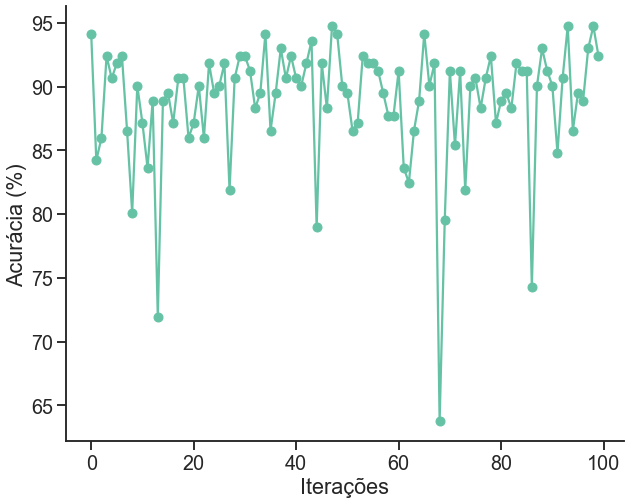

In [272]:
fig = plt.figure(figsize=(10, 8))
_ = plt.plot(accs, marker ='o')
plt.ylabel("Acurácia (%)")
plt.xlabel("Iterações")
sns.despine()